## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import numpy as np
import pandas as pd
from scipy.stats import norm

%matplotlib inline

In [31]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [27]:
n = len(df)
n

130

In [9]:
temp_males = df[df.gender == 'M']['temperature']
temp_females = df[df.gender == 'F']['temperature']

In [5]:
temp_males.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [13]:
temp_males.count(), temp_females.count()

(65, 65)

In [15]:
temp_males.mean(), temp_females.mean()

(98.104615384615371, 98.393846153846141)

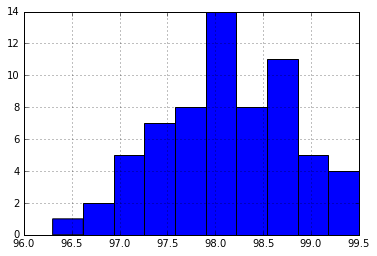

In [8]:
temp_males.hist()

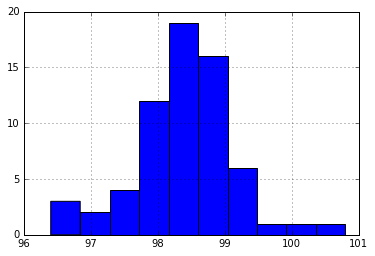

In [10]:
temp_females.hist()

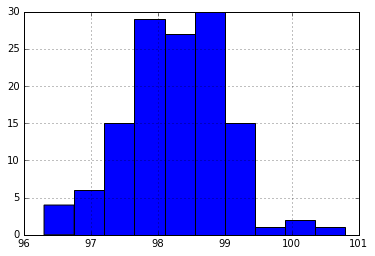

In [17]:
df.temperature.hist()

In [18]:
df.temperature.mean()

98.249230769230749

#### Question 1: Is the distribution of body temperatures normal?

Are these distributions normal?  Maybe.  Hard to tell with only 65 samples in each M/F data set.

#### Question 2: Is the true population mean really 98.6 degrees F?

Let's assume it's 1992 and someone is proposing that the population mean is actually 98.2 degrees F (until now we have always assumed it is 98.6).

The sample mean here is 98.24923.

Let's use hypothesis testing.

Null hypothesis ($H_0$): population mean is 98.6

Alternate hypothesis ($H_1$): population mean is not 98.6

In [70]:
mean_sample = df['temperature'].mean()
mean_sample

98.249230769230749

If the null hypothesis is true then:

In [72]:
mean_population = 98.6

We don't know the standard deviation of the population but a reasonable thing to do is to assume it is the same as the standard deviation of the sample.

In [48]:
sigma_sample = df['temperature'].std()
sigma_sample

0.73318315803894563

In [73]:
sigma_population = sigma_sample / np.sqrt(n)
sigma_population

0.064304416837891024

What is the probability of getting 98.249230769230749 or less?

First calculate the number of standard deviations this would be from the mean:

In [74]:
z = (mean_population - 98.249230769230749)/sigma_population
z

5.4548232923645195

What's the cumulative area under the normal distribution up to this point?

In [75]:
norm.cdf(z)

0.99999997548921493

So the p-value is:

In [76]:
p_value = 1.0 - norm.cdf(z)
p_value

2.4510785068265761e-08

In [77]:
1.0/p_value

40798366.809339985

I.e. Only a 1-in-40 million chance that this result could have happened under the null hypothesis.

Conclusion: **It is highly unlikely that the null hypothesis is true.**  I.e. population mean is not 98.6

#### Question 3: At what temperature should we consider someone's temperature to be "abnormal"?

Let's define "normal" as the temperature range within which 95% of people's temperature is.

Let's also assume that the population mean is 98.2

In [81]:
mean_population = 98.2

In [84]:
conf_limits_95 = norm.ppf((0.025, 0.975))
conf_limits_95

array([-1.95996398,  1.95996398])

In [85]:
normal_range = conf_limits_95*sigma_population + mean_population
normal_range

array([ 98.07396566,  98.32603434])

#### Question 3: Is there a significant difference between males and females in normal temperature?



Null hypothesis ($H_0$): The sample data came from the same population - i.e. there is no difference between the temperatre of men and women ($\mu_X = \mu_Y$)

Alternate hypothesis ($H_1$): The sample data came from two different, independent populations: $Z = X + Y$

Note that if X and Y are completely independent, then the variance of the sum of X and Y is going to be the sum of the variances of each.

I.e.

$Var(Z) = Var(X)+Var(Y)$




The difference between the two sample means is

In [89]:
delta_means = temp_males.mean() - temp_females.mean()
delta_means

-0.28923076923076962

What is the probability that a difference of this amount or more would occur if the null hypothesis were true (there is no difference between men and women)?

I.e.  we want the p-value:

$P((\mu_X - \mu_Y)^2 > \Delta_\mu^2)$

If $A = X - Y$,

then

$\mu_A = \mu_X - \mu_Y$

and

$\sigma_A^2 = \sigma_X^2 + \sigma_Y^2$

$P(\mu_A^2 > \Delta_\mu^2)$ = 

So the standard deviation of the differences between men and women is:

In [106]:
sigma_differences = temp_males.std() + temp_females.std()
sigma_differences

1.4422435150579573

If the null hypothesis is true, then $\mu_X - \mu_Y = 0$

Calculate the p-value for the difference in the means in the sample

In [107]:
z = -delta_means / sigma_differences
z

0.20054225670700743

In [108]:
norm.cdf(z)

0.57947174345435148

So the p-value is:

In [109]:
p_value = 1.0 - norm.cdf(z)
p_value

0.42052825654564852

I.e. There is over a 40% chance that this result could have happened under the null hypothesis.

Conclusion: **We can't reject the null hypothesis.**  I.e. there is no evidence here that on average, men and women have different body temperatures (we can assume $\mu_X = \mu_Y$)